In [1]:
import numpy as np
import matplotlib.pyplot as plt

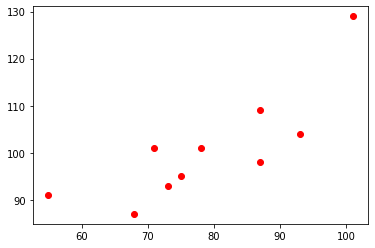

In [2]:
# 创建实验数据
X = [55, 71, 68, 87, 101, 87, 75, 78, 93, 73]
Y = [91, 101, 87, 109, 129, 98, 95, 101, 104, 93]

%matplotlib inline
plt.plot(X, Y, 'ro')
plt.show()

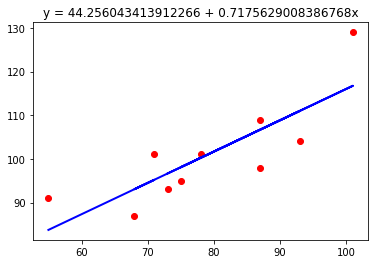

In [3]:
# 最小二乘法求线性回归方程系数
def linear_regression(x, y):
    N = len(x)
    sumx = sum(x)
    sumy = sum(y)
    sumx2 = sum(i**2 for i in x)
    sumxy = sum(list(map(lambda i,j: i*j, x, y)))

    w0 = np.mat([[N, sumx], [sumx, sumx2]])
    w1 = np.array([sumy, sumxy])

    return np.linalg.solve(w0, w1)

w0, w1 = linear_regression(X, Y)

plt.plot(X, Y, 'ro', X, [w0 + w1 * x for x in X], 'b', linewidth=2)
plt.title("y = {} + {}x".format(w0, w1))
plt.show()

结束（损失小于阈值）
w0: 43.036132, w1: 0.675138, error1: 318.884986, iter: 67787


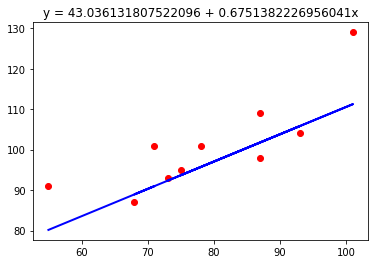

In [4]:
# 梯度下降法求线性回归方程系数
def gradient_descent(x, y):
    # 参数
    alpha = 0.0001        # 步长
    epsilon = 0.00001    # 阈值
    max_iter = 100000    # 最大迭代次数
    # 变量
    current_iter = 0             # 迭代次数
    w0 = 0
    w1 = 0
    error1 = 0
    error0 = 0          # 残差
    m = len(x)
    while True:
        current_iter += 1

        for i in range(m):
            # 拟合函数为 y = w0 + w1 * x
            diff = (w0 + w1 * x[i]) - y[i]

            # 梯度
            w0 -= alpha * diff * 1
            w1 -= alpha * diff * x[i]

        # 损失
        error1 = 0
        for i in range(m):
            error1 += (y[i] - (w0 + w1 * x[i])) ** 2 / 2

        # 比较误差与阈值
        if abs(error1 - error0) < epsilon:
            print("结束（损失小于阈值）")
            break
        elif current_iter >= max_iter:
            print("结束（超过最大迭代次数）")
            break
        else:
            error0 = error1
    print("w0: %f, w1: %f, error1: %f, iter: %d" % (w0, w1, error1, current_iter))
    return w0, w1


w0, w1 = gradient_descent(X, Y)

plt.plot(X, Y, 'ro', X, [w0 + w1 * x for x in X], 'b', linewidth=2)
plt.title("y = {} + {}x".format(w0, w1))
plt.show()